In [179]:
import numpy as np
import pandas as pd
import os
import sys




trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [180]:
trainset.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [181]:
trainset.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

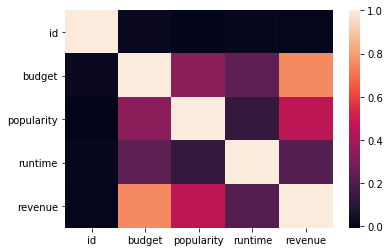

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(trainset.corr())

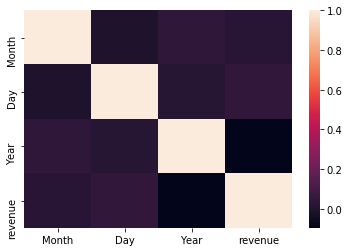

In [183]:
trainset[['Month','Day', 'Year']] = trainset['release_date'].str.split('/',expand=True)
trainset_release_date = trainset[['Month', 'Day', 'Year', 'revenue']]
trainset_release_date

trainset_release_date = trainset_release_date.astype(float)

trainset_release_date

cor = trainset_release_date.corr()

sns.heatmap(cor)

trainset = trainset.drop(['Year'], axis=1)

In [184]:
trainset.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
Month                       0
Day                         0
dtype: int64

In [185]:
runtime_mean = trainset['runtime'].mean()
print(runtime_mean)
trainset['runtime'] = trainset['runtime'].replace(0, runtime_mean)

107.85657104736491


In [186]:
trainset['homepage'] = trainset['homepage'].fillna(0)
trainset.loc[trainset['homepage'] != 0, 'homepage'] = 1

In [187]:
# Uso da função do Kernel Simple TMDB prediction with Linear Regression para tratar colunas JSON com uma 

def proc_json(string, key):
    try:
        data = eval(string)
        return ",".join([d[key] for d in data])
    except:
        return ''

def proc_json_len(string):
    try:
        data = eval(string)
        return len(data)
    except:
        return 0


trainset.belongs_to_collection = trainset.belongs_to_collection.apply(lambda x: proc_json(x, 'name'))

trainset.genres = trainset.genres.apply(lambda x: proc_json(x, 'name'))

trainset.production_companies = trainset.production_companies.apply(lambda x: proc_json(x, 'name'))

trainset.production_countries = trainset.production_countries.apply(lambda x: proc_json(x, 'iso_3166_1'))

trainset.spoken_languages = trainset.spoken_languages.apply(lambda x: proc_json(x, 'iso_639_1'))

trainset.Keywords = trainset.Keywords.apply(lambda x: proc_json(x, 'name'))

trainset.cast = trainset.cast.apply(proc_json_len)

trainset.crew = trainset.crew.apply(proc_json_len)


In [188]:
#Tratamente de genres

genres = []
for idx, val in trainset.genres.iteritems():
    gen_list = val.split(',')
    for gen in gen_list:
        if gen == '':
            continue

        if gen not in genres:
            genres.append(gen)
            

genre_column_names = []
for gen in genres:
    col_name = 'genres' + gen.replace(' ', '_')
    trainset[col_name] = trainset.genres.str.contains(gen).astype('uint8')
    genre_column_names.append(col_name)
